In [ ]:
%load_ext autoreload
%autoreload 2
    
import os
import pickle
from pathlib import Path

from kcm.dynamical_systems import plot_3d_trajectories, plot_3d_time_colored_trajectories, plot_1d_trajectories

from pydmd import DMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('default')

In [6]:
num_cats = 4
num_samples = 100
system_dimension = 3
noisy_data=False
noise_std=0.01

sample_name = f'noisy_{noise_std}_samples' if noisy_data > 0 else 'samples'
data_path = Path().resolve().parents[0] / 'data' / f'{system_dimension}-dimensional-systems' / f"dataset_{num_cats}_class_{num_samples}_{sample_name}.pkl"

with open(data_path, "rb") as f:
    dataset = pickle.load(f)

In [64]:
np.diff(dataset['harmonic_oscillator'][0]['t'])

array([0.040008, 0.040008, 0.040008, ..., 0.040008, 0.040008, 0.040008],
      shape=(4999,))

In [7]:
sample_dataset = {key : value[1:2] for key, value in dataset.items()}

In [8]:
# plot_3d_time_colored_trajectories(sample_dataset, n_examples=1)

In [9]:
sample_dataset.keys()

dict_keys(['harmonic_oscillator', 'van_der_pol_oscillator', 'nonlinear_spring', 'piecewise_linear_oscillator'])

\begin{align}
    m_j = \frac{\|\boldsymbol{v}_j\|}{\sum \limits _{i=1}^{d} \|\boldsymbol{v}_i\|}
\end{align}

\begin{align}
    P = \{ \lambda_i, m_i \}_{i=1}^{d}
\end{align}

\begin{align}
    \bar{P} = \{ \bar{\lambda}_i, \bar{m}_i \}_{i=1}^{\bar{d}}
\end{align}

\begin{align}
    \mathcal{M}_{WM}(P,\bar{P}) = \sqrt{ \sum \limits _{i=1}^{n} \sum \limits _{j=1}^{\bar{n}} \gamma_{ij} \|\lambda_j - \bar{\lambda}_i\| }
\end{align}

\begin{align}
    C = \{P_1^*, \cdots, P_k^*\}
\end{align}

\begin{align}
    A_{lr}x_0 = y_0 \\
    A_{lr}x_1 = y_1 \\
    \cdots
\end{align}

\begin{align}
    A_{dmd}x_0 = x_1 \\
    A_{dmd}x_1 = x_2 \\
    \cdots
\end{align}

\begin{align}
    A_{dmd} = \operatorname*{argmin}_{A_{dmd}} \|X' - A_{dmd}X\|
\end{align}

\begin{align}
    A_{lr} = \operatorname*{argmin}_{A_{lr}} \|Y - A_{lr}X\|
\end{align}

$x_k$

\begin{align}
    \boldsymbol{F}^t
\end{align}

\begin{align}
    \boldsymbol{K}^t
\end{align}

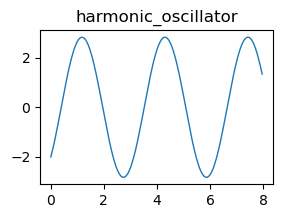

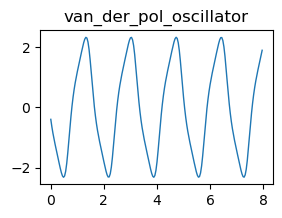

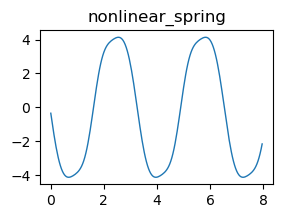

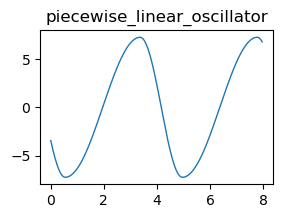

In [15]:
plot_1d_trajectories(sample_dataset, n_examples=1, dim=1, frac=1/25, pos=0)

### Reconstruct Data Using DMD

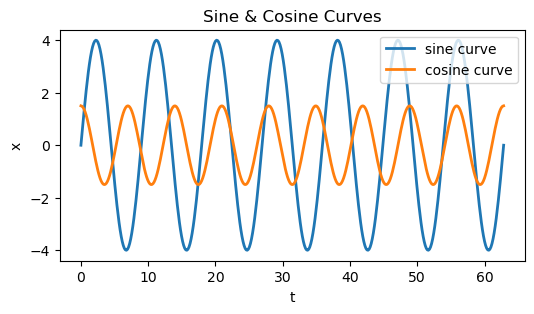

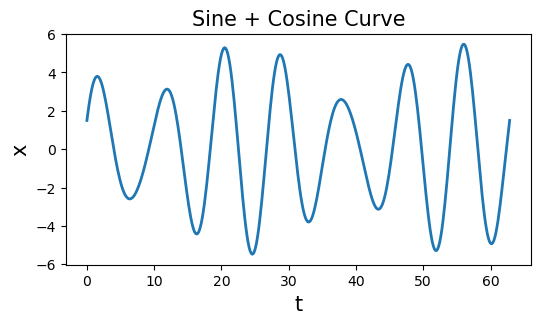

In [267]:
n = 400

domain = np.linspace(0,20*np.pi,n)
f1 = lambda x : 4*np.sin(0.7*x)
f2 = lambda x : 1.5*np.cos(0.9*x)
f = lambda x : f1(x) + f2(x)
X = f(domain)

plt.figure(figsize=(6,3))
plt.plot(domain,f1(domain),linewidth=2)
plt.plot(domain,f2(domain),linewidth=2)
plt.legend(['sine curve','cosine curve'])
plt.title('Sine & Cosine Curves')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


plt.figure(figsize=(6,3))
plt.plot(domain,X,linewidth=2)
plt.title('Sine + Cosine Curve',fontsize=15)
plt.xlabel('t',fontsize=15)
plt.ylabel('x',fontsize=15)
plt.show()

In [23]:
X = sample_dataset['harmonic_oscillator'][0]['y']
n = X.shape[1]
domain = sample_dataset['harmonic_oscillator'][0]['t']

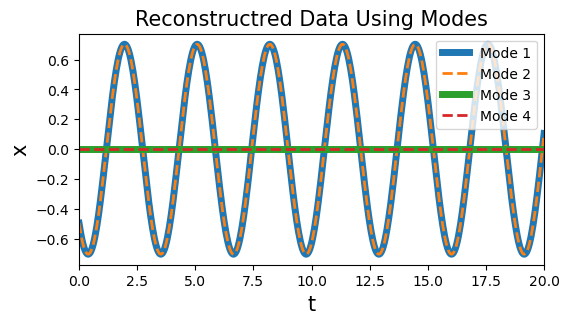

In [57]:
d = 1
X_delay = np.vstack([X[:,i:n-d+i] for i in range(d+1)]).T
dt = domain[1] - domain[0]
    
dmd = DMD(svd_rank=-1)
dmd.fit(X_delay.T);

eigs = dmd.eigs
amplitudes = dmd.amplitudes
modes = dmd.modes

reconstructed_data = []
plt.figure(figsize=(6,3))

ind = 0
eig_matrix = np.vstack([eigs[ind]**i for i in range(n)]).T
Y_reconstructed1 = (modes[:,ind][:,np.newaxis] * amplitudes[ind] @ eig_matrix).real
reconstructed_data.append(Y_reconstructed1)

ind = 1
eig_matrix = np.vstack([eigs[ind]**i for i in range(n)]).T
Y_reconstructed2 = (modes[:,ind][:,np.newaxis] * amplitudes[ind] @ eig_matrix).real
reconstructed_data.append(Y_reconstructed2)

ind = 2
eig_matrix = np.vstack([eigs[ind]**i for i in range(n)]).T
Y_reconstructed3 = (modes[:,ind][:,np.newaxis] * amplitudes[ind] @ eig_matrix).real
reconstructed_data.append(Y_reconstructed3)

ind = 3
eig_matrix = np.vstack([eigs[ind]**i for i in range(n)]).T
Y_reconstructed4 = (modes[:,ind][:,np.newaxis] * amplitudes[ind] @ eig_matrix).real
reconstructed_data.append(Y_reconstructed4)

plt.plot(domain,Y_reconstructed1[0,:],linewidth=5,linestyle='-',label='Mode 1')
plt.plot(domain,Y_reconstructed2[0,:],linewidth=2,linestyle='--',label='Mode 2')
plt.plot(domain,Y_reconstructed3[0,:],linewidth=5,linestyle='-',label='Mode 3')
plt.plot(domain,Y_reconstructed4[0,:],linewidth=2,linestyle='--',label='Mode 4')
# plt.plot(domain[:n-d],Y_reconstructed1[0,:] + Y_reconstructed2[0,:],linewidth=2,label='Reconstructed')

plt.title('Reconstructred Data Using Modes',fontsize=15)
plt.xlabel('t',fontsize=15)
plt.ylabel('x',fontsize=15)
plt.xlim([0,20])
plt.legend()
plt.show()

domain = np.linspace(0,20*np.pi,n)
f1 = lambda x : 4*np.sin(0.7*x)
f2 = lambda x : 1.5*np.cos(0.9*x)
f = lambda x : f1(x) + f2(x)

$$ \large{ X = 4sin(0.7t) + \frac{3}{2} cos(0.9t)} $$

$$ \large{ \sum_{j=1}^{r} \lambda_j^t \phi_j(\boldsymbol{g}(x_0))v_j } $$

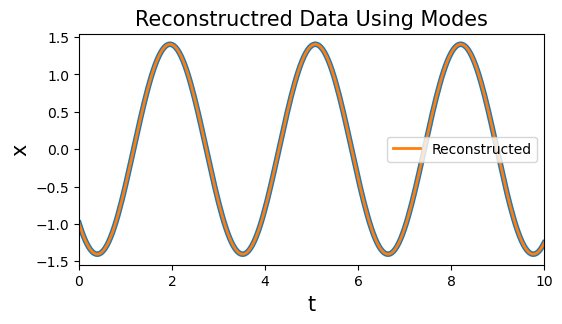

In [54]:
plt.figure(figsize=(6,3))
# plt.plot(domain,f(domain),linewidth=5,label='Original')
plt.plot(domain[:-1],X_delay[:,0],linewidth=4)
plt.plot(domain,np.array(reconstructed_data).sum(axis=0)[0,:],linewidth=2,label='Reconstructed')
plt.title('Reconstructred Data Using Modes',fontsize=15)
plt.xlabel('t',fontsize=15)
plt.ylabel('x',fontsize=15)
plt.xlim([0,10])
plt.legend()
plt.show()